In [1]:
import json
from pprint import pprint
import requests
import pandas as pd
import numpy as np

Lamentablemente, los crímenes forman parte de la historia de la humanidad. A lo largo de los años, se hace eco de homicidios y otras actividades delictivas.

Algunos crímenes reciben el sensacionalismo de la prensa y otros ni han recibido más de una columna. El tratamiento de la prensa ha jugado a favor y en contra de las investigaciones.

Ello ha ocasionado que en algunas investigaciones se declare el derecho de Sumario, lo que se refiere a que las diligencias practicadas en la investigación sólo pueden ser conocidas por las partes que se encuentren personadas en la causa, lo que supone que nadie, a excepción de las mencionadas, puede conocer su contenido.

Se ha seleccionado la API de la policía de Reino Unido para compararlo con alguna publicación sobre el crimen.

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

police_url = 'https://data.police.uk/api/outcomes-at-location?date=2019-04&lat=50.807118&lng=-0.480772'

In [3]:
#Extraemos datos de API de la policía de Reino Unido, manejan distinta tipo de data, siendo la más completa extraerlo 
#por fecha y coordenadas de localización. Seleccionamos el mes de abril de 2019 y coordenadas 
#que nos ubican en una localidad UK

response = requests.get(police_url)
crimesap = response.json()
crimesap

[{'category': {'code': 'no-further-action',
   'name': 'Investigation complete; no suspect identified'},
  'date': '2019-04',
  'person_id': None,
  'crime': {'category': 'other-theft',
   'location_type': 'Force',
   'location': {'latitude': '50.816706',
    'street': {'id': 1166088, 'name': 'On or near Parking Area'},
    'longitude': '-0.489219'},
   'context': '',
   'persistent_id': 'e91ced4b6994466deaa9080249d667c77f43e9da0b83562b2fb729485278ea6d',
   'id': 73754603,
   'location_subtype': 'PARKING',
   'month': '2019-04'}},
 {'category': {'code': 'unable-to-prosecute',
   'name': 'Unable to prosecute suspect'},
  'date': '2019-04',
  'person_id': None,
  'crime': {'category': 'other-theft',
   'location_type': 'Force',
   'location': {'latitude': '50.804356',
    'street': {'id': 1165222, 'name': 'On or near Palm Court Cottages'},
    'longitude': '-0.480719'},
   'context': '',
   'persistent_id': 'd6313a631738dd6097593f83800211e60a54209e4b8155b61cdfb84e17054fb8',
   'id': 7215

In [4]:
#Generamos una Dataframe con los datos json

crimesapril= pd.DataFrame(crimesap)
crimesapril.head()    

,category,crime,date,person_id
0,"{'code': 'no-further-action', 'name': 'Investi...","{'category': 'other-theft', 'location_type': '...",2019-04,NaN
1,"{'code': 'unable-to-prosecute', 'name': 'Unabl...","{'category': 'other-theft', 'location_type': '...",2019-04,NaN
2,{'code': 'formal-action-not-in-public-interest...,"{'category': 'possession-of-weapons', 'locatio...",2019-04,NaN
3,"{'code': 'no-further-action', 'name': 'Investi...","{'category': 'vehicle-crime', 'location_type':...",2019-04,NaN
4,"{'code': 'awaiting-court-result', 'name': 'Awa...","{'category': 'violent-crime', 'location_type':...",2019-04,NaN


In [5]:
#Normalizamos los datos y extraer nuestras categorías

from pandas.io.json import json_normalize

def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [6]:
#Aplicamos a columna category

column1 = ['category']
crimesflat = flatten(crimesapril, column1)
crimesflat.head(10)

,crime,date,person_id,category_code,category_name
0,"{'category': 'other-theft', 'location_type': '...",2019-04,NaN,no-further-action,Investigation complete; no suspect identified
1,"{'category': 'other-theft', 'location_type': '...",2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect
2,"{'category': 'possession-of-weapons', 'locatio...",2019-04,NaN,formal-action-not-in-public-interest,Formal action is not in the public interest
3,"{'category': 'vehicle-crime', 'location_type':...",2019-04,NaN,no-further-action,Investigation complete; no suspect identified
4,"{'category': 'violent-crime', 'location_type':...",2019-04,NaN,awaiting-court-result,Awaiting court outcome
5,"{'category': 'violent-crime', 'location_type':...",2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect
6,"{'category': 'criminal-damage-arson', 'locatio...",2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect
7,"{'category': 'shoplifting', 'location_type': '...",2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect
8,"{'category': 'violent-crime', 'location_type':...",2019-04,NaN,no-further-action,Investigation complete; no suspect identified
9,"{'category': 'other-crime', 'location_type': '...",2019-04,NaN,further-investigation-not-in-public-interest,Further investigation is not in the public int...


In [7]:
#Aplicamos a columna crime

column2 = ['crime']
crimesflat1 = flatten(crimesflat, column2)
crimesflat1.head(60)

,date,person_id,category_code,category_name,crime_category,crime_context,crime_id,crime_location,crime_location_subtype,crime_location_type,crime_month,crime_persistent_id
0,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,other-theft,,73754603,"{'latitude': '50.816706', 'street': {'id': 116...",PARKING,Force,2019-04,e91ced4b6994466deaa9080249d667c77f43e9da0b8356...
1,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,other-theft,,72158066,"{'latitude': '50.804356', 'street': {'id': 116...",ROAD,Force,2019-02,d6313a631738dd6097593f83800211e60a54209e4b8155...
2,2019-04,NaN,formal-action-not-in-public-interest,Formal action is not in the public interest,possession-of-weapons,,73755521,"{'latitude': '50.817431', 'street': {'id': 116...",ROAD,Force,2019-04,8ca8797005e300804d7ff5e4a492eeba93a11487138cb5...
3,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,vehicle-crime,,73757865,"{'latitude': '50.813702', 'street': {'id': 116...",ROAD,Force,2019-04,e1edf8ded818fa87aadd3dfa58ee6e7fee721cc1304c36...
4,2019-04,NaN,awaiting-court-result,Awaiting court outcome,violent-crime,,70184242,"{'latitude': '50.804195', 'street': {'id': 116...",ROAD,Force,2018-11,4e293bfadbce11dfb4a11f27f38ee759a023d04a98c20b...
5,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,violent-crime,,73758622,"{'latitude': '50.818302', 'street': {'id': 116...",ROAD,Force,2019-04,d1b221f0c7327b5d88df396887b7366c3e31fc0a8f28c8...
6,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,criminal-damage-arson,,73752469,"{'latitude': '50.813947', 'street': {'id': 116...",ROAD,Force,2019-04,bbf95868a9fb6735db349baa5c5422e39c191a8bc31013...
7,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,shoplifting,,71463933,"{'latitude': '50.817087', 'street': {'id': 116...",ROAD,Force,2019-01,6304a551840f9f0c57c8acac417510d79b58653724aec0...
8,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,violent-crime,,72693759,"{'latitude': '50.814609', 'street': {'id': 116...",ROAD,Force,2019-03,3a2882cf41cc42099c25f0bba1b3e6d5a260ea01b0e91f...
9,2019-04,NaN,further-investigation-not-in-public-interest,Further investigation is not in the public int...,other-crime,,73754152,"{'latitude': '50.804817', 'street': {'id': 116...",ROAD,Force,2019-04,75342fa43c808111de41b9b3264311bd9754ee235db235...


In [8]:
#Extraemos datos de diccionario de crime_location

crimesflat1['latitude']=crimesflat1['crime_location'].apply(lambda x: x['latitude'])
crimesflat1['longitude']=crimesflat1['crime_location'].apply(lambda x: x['longitude'])
crimesflat1['name']=crimesflat1['crime_location'].apply(lambda x: x['street']['name'])

crimesflat1

,date,person_id,category_code,category_name,crime_category,crime_context,crime_id,crime_location,crime_location_subtype,crime_location_type,crime_month,crime_persistent_id,latitude,longitude,name
0,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,other-theft,,73754603,"{'latitude': '50.816706', 'street': {'id': 116...",PARKING,Force,2019-04,e91ced4b6994466deaa9080249d667c77f43e9da0b8356...,50.816706,-0.489219,On or near Parking Area
1,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,other-theft,,72158066,"{'latitude': '50.804356', 'street': {'id': 116...",ROAD,Force,2019-02,d6313a631738dd6097593f83800211e60a54209e4b8155...,50.804356,-0.480719,On or near Palm Court Cottages
2,2019-04,NaN,formal-action-not-in-public-interest,Formal action is not in the public interest,possession-of-weapons,,73755521,"{'latitude': '50.817431', 'street': {'id': 116...",ROAD,Force,2019-04,8ca8797005e300804d7ff5e4a492eeba93a11487138cb5...,50.817431,-0.471664,On or near Old Worthing Road
3,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,vehicle-crime,,73757865,"{'latitude': '50.813702', 'street': {'id': 116...",ROAD,Force,2019-04,e1edf8ded818fa87aadd3dfa58ee6e7fee721cc1304c36...,50.813702,-0.483610,On or near Clarence Drive
4,2019-04,NaN,awaiting-court-result,Awaiting court outcome,violent-crime,,70184242,"{'latitude': '50.804195', 'street': {'id': 116...",ROAD,Force,2018-11,4e293bfadbce11dfb4a11f27f38ee759a023d04a98c20b...,50.804195,-0.493256,On or near Fosters Close
5,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,violent-crime,,73758622,"{'latitude': '50.818302', 'street': {'id': 116...",ROAD,Force,2019-04,d1b221f0c7327b5d88df396887b7366c3e31fc0a8f28c8...,50.818302,-0.479174,On or near Roundstone By-pass Road
6,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,criminal-damage-arson,,73752469,"{'latitude': '50.813947', 'street': {'id': 116...",ROAD,Force,2019-04,bbf95868a9fb6735db349baa5c5422e39c191a8bc31013...,50.813947,-0.478932,On or near Cheviot Close
7,2019-04,NaN,unable-to-prosecute,Unable to prosecute suspect,shoplifting,,71463933,"{'latitude': '50.817087', 'street': {'id': 116...",ROAD,Force,2019-01,6304a551840f9f0c57c8acac417510d79b58653724aec0...,50.817087,-0.494303,On or near Burmill Mews
8,2019-04,NaN,no-further-action,Investigation complete; no suspect identified,violent-crime,,72693759,"{'latitude': '50.814609', 'street': {'id': 116...",ROAD,Force,2019-03,3a2882cf41cc42099c25f0bba1b3e6d5a260ea01b0e91f...,50.814609,-0.494681,On or near Guildford Road
9,2019-04,NaN,further-investigation-not-in-public-interest,Further investigation is not in the public int...,other-crime,,73754152,"{'latitude': '50.804817', 'street': {'id': 116...",ROAD,Force,2019-04,75342fa43c808111de41b9b3264311bd9754ee235db235...,50.804817,-0.476078,On or near The Way


In [9]:
#Renombramos las columnas

crimesflat1= crimesflat1.rename(columns={'latitude': 'crime_latitude', 'longitude': 'crime_longitude', 'name':'crime_location_name'}, inplace=False)
crimesflat1.columns

Index(['date', 'person_id', 'category_code', 'category_name', 'crime_category',
       'crime_context', 'crime_id', 'crime_location', 'crime_location_subtype',
       'crime_location_type', 'crime_month', 'crime_persistent_id',
       'crime_latitude', 'crime_longitude', 'crime_location_name'],
      dtype='object')

In [10]:
#Borramos columnas innecesarias

crimesflat1.drop(columns = ['crime_location', 'category_code', 'crime_context', 'person_id', 'crime_persistent_id'], inplace = True, errors = 'ignore')
crimesflat1.head()

,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name
0,2019-04,Investigation complete; no suspect identified,other-theft,73754603,PARKING,Force,2019-04,50.816706,-0.489219,On or near Parking Area
1,2019-04,Unable to prosecute suspect,other-theft,72158066,ROAD,Force,2019-02,50.804356,-0.480719,On or near Palm Court Cottages
2,2019-04,Formal action is not in the public interest,possession-of-weapons,73755521,ROAD,Force,2019-04,50.817431,-0.471664,On or near Old Worthing Road
3,2019-04,Investigation complete; no suspect identified,vehicle-crime,73757865,ROAD,Force,2019-04,50.813702,-0.483610,On or near Clarence Drive
4,2019-04,Awaiting court outcome,violent-crime,70184242,ROAD,Force,2018-11,50.804195,-0.493256,On or near Fosters Close


In [11]:
#Realizamos limpieza de caracteres especiales

import re

crimesflat1['crime_category'] = crimesflat1['crime_category'].str.replace(r'[^\w\s]'," ")
crimesflat1['crime_location_name'] = crimesflat1['crime_location_name'].str.replace(r'[^\w\s\-]','')
crimesflat1['category_name'] = crimesflat1['category_name'].str.replace(r'[^\w\s\-]','')
crimesflat1.head()

,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name
0,2019-04,Investigation complete no suspect identified,other theft,73754603,PARKING,Force,2019-04,50.816706,-0.489219,On or near Parking Area
1,2019-04,Unable to prosecute suspect,other theft,72158066,ROAD,Force,2019-02,50.804356,-0.480719,On or near Palm Court Cottages
2,2019-04,Formal action is not in the public interest,possession of weapons,73755521,ROAD,Force,2019-04,50.817431,-0.471664,On or near Old Worthing Road
3,2019-04,Investigation complete no suspect identified,vehicle crime,73757865,ROAD,Force,2019-04,50.813702,-0.483610,On or near Clarence Drive
4,2019-04,Awaiting court outcome,violent crime,70184242,ROAD,Force,2018-11,50.804195,-0.493256,On or near Fosters Close


In [12]:
#Colocamos en minúsculas los valores de la columna crime_location_subtype

crimesflat1['crime_category'] = crimesflat1['crime_category'].str.capitalize()
crimesflat1.head()

,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name
0,2019-04,Investigation complete no suspect identified,Other theft,73754603,PARKING,Force,2019-04,50.816706,-0.489219,On or near Parking Area
1,2019-04,Unable to prosecute suspect,Other theft,72158066,ROAD,Force,2019-02,50.804356,-0.480719,On or near Palm Court Cottages
2,2019-04,Formal action is not in the public interest,Possession of weapons,73755521,ROAD,Force,2019-04,50.817431,-0.471664,On or near Old Worthing Road
3,2019-04,Investigation complete no suspect identified,Vehicle crime,73757865,ROAD,Force,2019-04,50.813702,-0.483610,On or near Clarence Drive
4,2019-04,Awaiting court outcome,Violent crime,70184242,ROAD,Force,2018-11,50.804195,-0.493256,On or near Fosters Close


In [13]:
#Le colocamos en letra capital

crimesflat1['crime_location_subtype'] = crimesflat1['crime_location_subtype'].str.capitalize()

crimesflat1.head()

,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name
0,2019-04,Investigation complete no suspect identified,Other theft,73754603,Parking,Force,2019-04,50.816706,-0.489219,On or near Parking Area
1,2019-04,Unable to prosecute suspect,Other theft,72158066,Road,Force,2019-02,50.804356,-0.480719,On or near Palm Court Cottages
2,2019-04,Formal action is not in the public interest,Possession of weapons,73755521,Road,Force,2019-04,50.817431,-0.471664,On or near Old Worthing Road
3,2019-04,Investigation complete no suspect identified,Vehicle crime,73757865,Road,Force,2019-04,50.813702,-0.483610,On or near Clarence Drive
4,2019-04,Awaiting court outcome,Violent crime,70184242,Road,Force,2018-11,50.804195,-0.493256,On or near Fosters Close


In [14]:
#Las coordenas de los crímenes nos ubican en la población de Littlehampton, 
#por lo que seleccionamos un publicación de la ciudad relacionada con sucesos criminales

import requests
from pprint import pprint
from bs4 import BeautifulSoup

URL_Littlehampton = "https://www.littlehamptongazette.co.uk/news/crime/worthing-teenager-stabbed-in-knifepoint-robbery-1-8887759"

In [15]:
#Extraemos los párrafos en forma de lista

response = requests.get(URL_Littlehampton)
soup = BeautifulSoup(response.text, "html.parser")


text_container = soup.find("section", {'class': 'article-content'})
paragraphs = text_container.find_all("p")
paragraphs_c = [paragraph.get_text() for paragraph in paragraphs]

pprint(paragraphs_c)


['A spokesman for Sussex Police said two 17-year-old boys were attacked by '
 'three youths in Littlehampton Road, Durrington, at around 5.25pm on Tuesday '
 '(April 9).',
 'One of the boys was thrown to the ground, said the spokesman, and received '
 "puncture wounds to his upper body 'consistent with being stabbed' - he was "
 'later treated at Worthing Hospital.',
 "The boy's wallet, containing cash and personal items, was stolen, police "
 'said, and added that the other teenager was uninjured and had nothing '
 'stolen.',
 'The three youths, who were all dressed in dark clothing, then ran off in an '
 'easterly direction, said police.',
 'Two 17-year-old boys and a 16-year-old have been arrested on suspicion of '
 'robbery and attempted robbery, police said, and were all bailed with '
 'conditions and curfews until May 7 while enquiries continue.',
 'Detective Constable Colin Taylor, of Worthing police investigations, said: '
 '"We would like to talk to anyone who witnessed the ro

In [16]:
#creamos diccionario con un index de los párrafos
number_paragrahps = [1,2,3,4,5,6,7,8]

paragrahpsdf = {number_paragrahps[i]: paragraphs_c[i] for i in range(len(number_paragrahps))}
  
print(paragrahpsdf)

{1: 'A spokesman for Sussex Police said two 17-year-old boys were attacked by three youths in Littlehampton Road, Durrington, at around 5.25pm on Tuesday (April 9).', 2: "One of the boys was thrown to the ground, said the spokesman, and received puncture wounds to his upper body 'consistent with being stabbed' - he was later treated at Worthing Hospital.", 3: "The boy's wallet, containing cash and personal items, was stolen, police said, and added that the other teenager was uninjured and had nothing stolen.", 4: 'The three youths, who were all dressed in dark clothing, then ran off in an easterly direction, said police.', 5: 'Two 17-year-old boys and a 16-year-old have been arrested on suspicion of robbery and attempted robbery, police said, and were all bailed with conditions and curfews until May 7 while enquiries continue.', 6: 'Detective Constable Colin Taylor, of Worthing police investigations, said: "We would like to talk to anyone who witnessed the robbery, who noticed any susp

In [17]:
#En base al diccionario, generamos un DataFrame de la noticia

newscrimes= pd.DataFrame(paragrahpsdf.items(), columns=['number_paragrahps','content'])

newscrimes.head(10)

,number_paragrahps,content
0,1,A spokesman for Sussex Police said two 17-year...
1,2,"One of the boys was thrown to the ground, said..."
2,3,"The boy's wallet, containing cash and personal..."
3,4,"The three youths, who were all dressed in dark..."
4,5,Two 17-year-old boys and a 16-year-old have be...
5,6,"Detective Constable Colin Taylor, of Worthing ..."
6,7,"""This was a violent but fortunately isolated i..."
7,8,Anybody with information is asked to contact p...


In [18]:
#Realizamos tratamiento de datos, limpiando los caracteres especiales

newscrimes['content'] = newscrimes['content'].str.replace(r'[^\w\s]'," ")

newscrimes.head(10)             

,number_paragrahps,content
0,1,A spokesman for Sussex Police said two 17 year...
1,2,One of the boys was thrown to the ground said...
2,3,The boy s wallet containing cash and personal...
3,4,The three youths who were all dressed in dark...
4,5,Two 17 year old boys and a 16 year old have be...
5,6,Detective Constable Colin Taylor of Worthing ...
6,7,This was a violent but fortunately isolated i...
7,8,Anybody with information is asked to contact p...


In [19]:
import nltk

nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x000001B416E0FD68>>

In [20]:
#Comenzamos a comprobar los textos con las herramientas de NLTK, tokenizamos la dataframe de la noticia

newsminning = newscrimes.copy()

newsminning['content'] = newsminning['content'].apply(lambda word: nltk.word_tokenize(word))
newsminning.head()

,number_paragrahps,content
0,1,"[A, spokesman, for, Sussex, Police, said, two,..."
1,2,"[One, of, the, boys, was, thrown, to, the, gro..."
2,3,"[The, boy, s, wallet, containing, cash, and, p..."
3,4,"[The, three, youths, who, were, all, dressed, ..."
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o..."


In [21]:
#Ahora, le aplicamos al DataFrame de la API de la Policía de Reino Unido
crimesminning = crimesflat1.copy()


crimesminning['crime_location_name'] = crimesminning['crime_location_name'].apply(lambda word: nltk.word_tokenize(word))
crimesminning['category_name'] = crimesminning['category_name'].apply(lambda word: nltk.word_tokenize(word))
crimesminning['crime_category'] = crimesminning['crime_category'].apply(lambda word: nltk.word_tokenize(word))
crimesminning.head()

,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name
0,2019-04,"[Investigation, complete, no, suspect, identif...","[Other, theft]",73754603,Parking,Force,2019-04,50.816706,-0.489219,"[On, or, near, Parking, Area]"
1,2019-04,"[Unable, to, prosecute, suspect]","[Other, theft]",72158066,Road,Force,2019-02,50.804356,-0.480719,"[On, or, near, Palm, Court, Cottages]"
2,2019-04,"[Formal, action, is, not, in, the, public, int...","[Possession, of, weapons]",73755521,Road,Force,2019-04,50.817431,-0.471664,"[On, or, near, Old, Worthing, Road]"
3,2019-04,"[Investigation, complete, no, suspect, identif...","[Vehicle, crime]",73757865,Road,Force,2019-04,50.813702,-0.483610,"[On, or, near, Clarence, Drive]"
4,2019-04,"[Awaiting, court, outcome]","[Violent, crime]",70184242,Road,Force,2018-11,50.804195,-0.493256,"[On, or, near, Fosters, Close]"


In [22]:
#Obtenemos las stopwords de cada uno de los dataframes
from nltk.corpus import stopwords

stop = stopwords.words('english')
newsminning['stopwords'] = newsminning['content'].apply(lambda paragraph: len([word for word in paragraph if word in stop]))
newsminning.head()

,number_paragrahps,content,stopwords
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10
3,4,"[The, three, youths, who, were, all, dressed, ...",8
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14


In [23]:
crimesminning['stopwords'] = crimesminning['crime_location_name'].apply(lambda paragraph: len([word for word in paragraph if word in stop]))

crimesminning.head()


,date,category_name,crime_category,crime_id,crime_location_subtype,crime_location_type,crime_month,crime_latitude,crime_longitude,crime_location_name,stopwords
0,2019-04,"[Investigation, complete, no, suspect, identif...","[Other, theft]",73754603,Parking,Force,2019-04,50.816706,-0.489219,"[On, or, near, Parking, Area]",1
1,2019-04,"[Unable, to, prosecute, suspect]","[Other, theft]",72158066,Road,Force,2019-02,50.804356,-0.480719,"[On, or, near, Palm, Court, Cottages]",1
2,2019-04,"[Formal, action, is, not, in, the, public, int...","[Possession, of, weapons]",73755521,Road,Force,2019-04,50.817431,-0.471664,"[On, or, near, Old, Worthing, Road]",1
3,2019-04,"[Investigation, complete, no, suspect, identif...","[Vehicle, crime]",73757865,Road,Force,2019-04,50.813702,-0.483610,"[On, or, near, Clarence, Drive]",1
4,2019-04,"[Awaiting, court, outcome]","[Violent, crime]",70184242,Road,Force,2018-11,50.804195,-0.493256,"[On, or, near, Fosters, Close]",1


In [24]:
#Se calcula el total de palabras por cada párrafo del artículo

newsminning['word_count'] = newsminning['content'].apply(len)
newsminning.head()

,number_paragrahps,content,stopwords,word_count
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14,31
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25
3,4,"[The, three, youths, who, were, all, dressed, ...",8,19
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14,36


In [25]:
#También, el total de caracteres por párrafos

newsminning['characteres_total'] = newsminning['content'].apply(lambda paragraph: sum(len(word) for word in paragraph))
newsminning.head()

,number_paragrahps,content,stopwords,word_count,characteres_total
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28,127
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14,31,148
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25,121
3,4,"[The, three, youths, who, were, all, dressed, ...",8,19,86
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14,36,165


In [26]:
#Se estima la media de palabras utlizadas en el texto

def avg_word(paragraph):
    return (sum(len(word) for word in paragraph)/len(paragraph))

In [27]:
newsminning['avg_word'] = newsminning['content'].apply(avg_word)
newsminning.head()

,number_paragrahps,content,stopwords,word_count,characteres_total,avg_word
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28,127,4.535714
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14,31,148,4.774194
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25,121,4.840000
3,4,"[The, three, youths, who, were, all, dressed, ...",8,19,86,4.526316
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14,36,165,4.583333


In [28]:
#Se calcula el número de palabras con mayúsculas

newsminning['capitalize_words'] = newsminning['content'].apply(lambda paragraph: len([word for word in paragraph if word.istitle()]))
newsminning.head()

,number_paragrahps,content,stopwords,word_count,characteres_total,avg_word,capitalize_words
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28,127,4.535714,8
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14,31,148,4.774194,3
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25,121,4.840000,1
3,4,"[The, three, youths, who, were, all, dressed, ...",8,19,86,4.526316,1
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14,36,165,4.583333,2


In [29]:
#También, los dígitos del dataframe de la policía

newsminning['numbers'] = newsminning['content'].apply(lambda text: len([word for word in text if word.isdigit()]))
newsminning.head()

,number_paragrahps,content,stopwords,word_count,characteres_total,avg_word,capitalize_words,numbers
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28,127,4.535714,8,3
1,2,"[One, of, the, boys, was, thrown, to, the, gro...",14,31,148,4.774194,3,0
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25,121,4.840000,1,0
3,4,"[The, three, youths, who, were, all, dressed, ...",8,19,86,4.526316,1,0
4,5,"[Two, 17, year, old, boys, and, a, 16, year, o...",14,36,165,4.583333,2,3


In [30]:
#Obtenemos las lista de palabras frecuentes de cada dataframe acorde a las columnas que nos interesan

freqcha = pd.Series(' '.join(" ".join(paragraph) for paragraph in newsminning['content']).split(" ")).value_counts()[:10]
freqcha

and       8
to        7
the       7
said      6
police    5
in        5
was       5
or        5
who       5
with      4
dtype: int64

In [31]:
freqcha2 = pd.Series(' '.join(" ".join(paragraph) for paragraph in crimesminning['crime_location_name']).split(" ")).value_counts()[:10]
freqcha2

near        57
or          57
On          57
Close       12
Road         7
Crescent     6
Parking      5
Drive        5
Mews         5
Area         5
dtype: int64

In [32]:
freqcha3 = pd.Series(' '.join(" ".join(paragraph) for paragraph in crimesminning['crime_category']).split(" ")).value_counts()[:10]
freqcha3

crime          23
Violent        18
Criminal       14
arson          14
damage         14
theft           8
Other           8
order           6
Public          6
Shoplifting     4
dtype: int64

In [33]:
#También, las menos frecuentes

less_freq = pd.Series(' '.join(" ".join(paragraph) for paragraph in newsminning['content']).split(" ")).value_counts()[-10:]
less_freq

attempted     1
added         1
containing    1
phone         1
an            1
April         1
violent       1
981           1
A             1
thinks        1
dtype: int64

In [34]:
less_freq2 = pd.Series(' '.join(" ".join(paragraph) for paragraph in crimesminning['crime_location_name']).split(" ")).value_counts()[-10:]
less_freq2

Elm           1
Pinewood      1
Old           1
Burwash       1
Warren        1
Clarence      1
Veronica      1
Canterbury    1
Herne         1
Fosters       1
dtype: int64

In [35]:
#Aplicamos la herramienta de lemmatize a nuestro contenido

from textblob import Word
newsminning['content'] = newsminning['content'].apply(lambda paragraph: [Word(word).lemmatize() for word in paragraph])
newsminning.head()

,number_paragrahps,content,stopwords,word_count,characteres_total,avg_word,capitalize_words,numbers
0,1,"[A, spokesman, for, Sussex, Police, said, two,...",6,28,127,4.535714,8,3
1,2,"[One, of, the, boy, wa, thrown, to, the, groun...",14,31,148,4.774194,3,0
2,3,"[The, boy, s, wallet, containing, cash, and, p...",10,25,121,4.840000,1,0
3,4,"[The, three, youth, who, were, all, dressed, i...",8,19,86,4.526316,1,0
4,5,"[Two, 17, year, old, boy, and, a, 16, year, ol...",14,36,165,4.583333,2,3


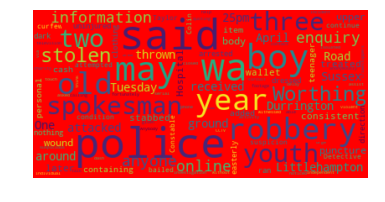

<Figure size 432x288 with 0 Axes>

In [49]:
#Visualizamos los datos obtenidos de nuestor analisis de textos

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, background_color="red").generate(" ".join(" ".join(paragraph) for paragraph in newsminning['content']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("wordcloudnews.png", dpi=900)

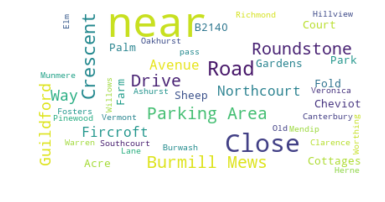

<Figure size 432x288 with 0 Axes>

In [50]:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(" ".join(" ".join(paragraph) for paragraph in crimesminning['crime_location_name']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("wordcloudcrime.png", dpi=900)

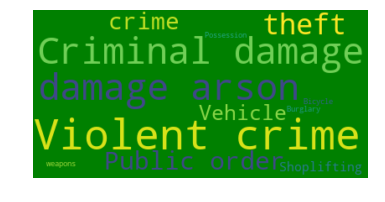

<Figure size 432x288 with 0 Axes>

In [51]:
wordcloud = WordCloud(max_font_size=50, background_color="green").generate(" ".join(" ".join(paragraph) for paragraph in crimesminning['crime_category']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("wordcloudcrime1.png", dpi=900)

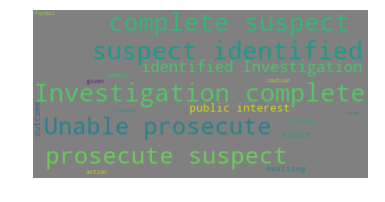

<Figure size 432x288 with 0 Axes>

In [52]:
wordcloud = WordCloud(max_font_size=50, background_color="grey").generate(" ".join(" ".join(paragraph) for paragraph in crimesminning['category_name']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("wordcloudcrime2.png", dpi=900)

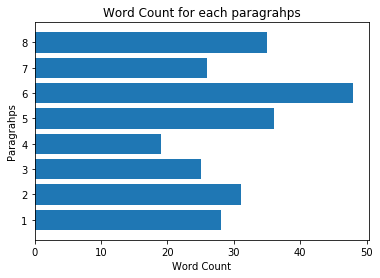

In [53]:
plt.title('Word Count for each paragrahps')
plt.xlabel('Word Count')
plt.ylabel('Paragrahps')
plt.barh(newsminning['number_paragrahps'], newsminning['word_count'])
plt.savefig("countword.png", dpi=900)

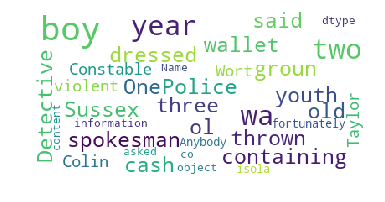

In [54]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(newsminning['content']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("stopword1.png", dpi=900)

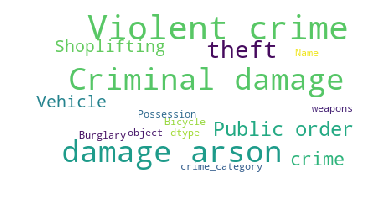

In [55]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(crimesminning['crime_category']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("stopeword3.png", dpi=900)

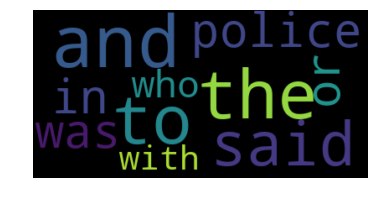

In [56]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(freqcha)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
crimesminning.to_csv('crimes.csv', index=False)

In [46]:
newsminning.to_csv('crimes.csv', index=False)